In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import csv
import os
import itertools

In [2]:
from scripts.utility import *
from scripts.decomposer import hierarchical_decomposition

# Features
It is a good idea to save our features in text files, so that we only have to calculate them once. Later on when we employ clustering, we can just read the values off of these files instead of iterating over the graphs again, which is time consuming.

## 1. Geometrical

### 1.1 Number of nodes and edges

In [ ]:
# Calculate the number of nodes and edges for each network and save them to files
with open('features/n_nodes.txt', 'w') as node_file, open('features/n_edges.txt', 'w') as edge_file:
    for network_id, graph in graph_generator():
        node_file.write(network_id + '\t' + str(nx.number_of_nodes(graph)) + '\n') # nx.number_of_nodes() function
        edge_file.write(network_id + '\t' + str(nx.number_of_edges(graph)) + '\n') # use tab character \t, not two spaces
        
###NOTE: Have to pull features from github before running script
##IDEA: Can calculate every feature on the same loop

### 1.2 Average node degree

In [ ]:
# Calculate the average node degree, i.e. the average number of edges that are connected to a node,
# for each network and write them to a file
with open('features/average_node_degree.txt', 'w') as file:
    for network_id, graph in graph_generator(): # check this access to graph_generator
        average_node_degree = np.mean(list(graph.degree().values()))
        file.write(network_id + '\t' + str(average_node_degree) + '\n')

### 1.3 Vein density

Vein density **σ** is calculated by summing the total length of all veins and dividing by total leaf area.


In [ ]:
with open('features/vein_density.txt', 'w') as file:
    for network_id, graph in graph_generator(): # check this access to graph_generator
        vein_density = get_vein_density(G)
        file.write(network_id + '\t' + str(vein_density) + '\n')

## 2. Topological

### 2.1 Nesting number

In [ ]:
with open('features/nesting_number.txt', 'w') as file, open('features/nesting_number_no_ext.txt', 'w') as file_no_ext:
    for network_id, graph in graph_generator(): # check this access to graph_generator
        H = clean_graph(graph)
        nesting_number, nesting_number_no_ext = get_nesting_numbers(H)
        file.write(network_id + '\t' + str(nesting_number) + '\n')
        file_no_ext.write(network_id + '\t' + str(nesting_number_no_ext) + '\n')

# Data Analysis

In [3]:
generator = graph_generator()

In [4]:
_, G = next(generator)

Removing disconnected parts
Removing intersecting edges.
Pruning.
Applying workaround to remove spurious collinear edges.
Removing offending edges.
Pruning again.
Connected components: 2


<IPython.core.display.Javascript object>


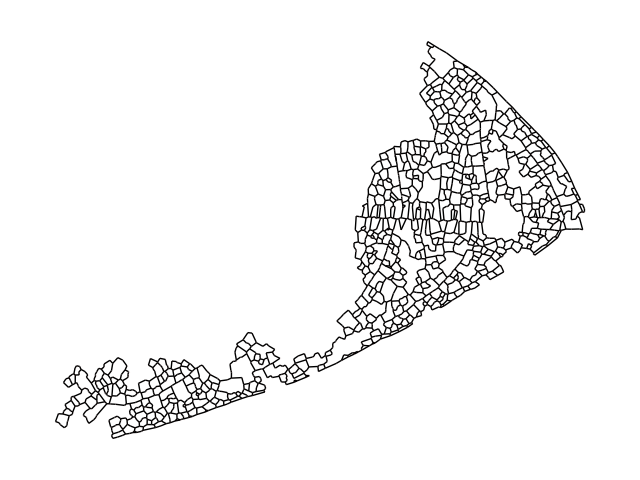

/Users/Ben/anaconda3/envs/leaf/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/Ben/anaconda3/envs/leaf/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/Ben/anaconda3/envs/leaf/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/Ben/anaconda3/envs/leaf/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 

In [7]:
basis = nx.cycle_basis(G)
subgraph_nodes = list(itertools.chain(*basis[:700])) # TODO: how to generate connected subgraphs?
H = clean_graph(G.subgraph(subgraph_nodes))
pos = nx.get_node_attributes(H,'pos')
nx.draw(H, pos=pos, node_size=0.0001)

In [8]:
nesting_number, nesting_number_no_ext = get_nesting_numbers(H)
print(nesting_number)
print(nesting_number_no_ext)

Detecting minimal cycles.
Number of cycles including boundary: 587.


/Users/Ben/Documents/Projects/Python/Leaf-architecture/scripts/cycle_basis.py:71: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if coords == None:


Detected fundamental cycles in 4.080212116241455s
Constructing dual.
Pruning dual.
Dual connected components: 1.
Detecting outermost loop and rewiring.
Performing hierarchical decomposition.
('Step 1/774\r',)
('Step 2/774\r',)
('Step 4/774\r',)
('Step 6/774\r',)
('Step 7/774\r',)
('Step 8/774\r',)
('Step 9/774\r',)
('Step 10/774\r',)
('Step 11/774\r',)
('Step 12/774\r',)
('Step 13/774\r',)
('Step 14/774\r',)
('Step 15/774\r',)
('Step 16/774\r',)
('Step 17/774\r',)
('Step 18/774\r',)
('Step 19/774\r',)
('Step 20/774\r',)
('Step 21/774\r',)
('Step 22/774\r',)
('Step 23/774\r',)
('Step 24/774\r',)
('Step 25/774\r',)
('Step 26/774\r',)
('Step 27/774\r',)
('Step 28/774\r',)
('Step 29/774\r',)
('Step 31/774\r',)
('Step 33/774\r',)
('Step 34/774\r',)
('Step 35/774\r',)
('Step 36/774\r',)
('Step 38/774\r',)
('Step 39/774\r',)
('Step 40/774\r',)
('Step 41/774\r',)
('Step 42/774\r',)
('Step 43/774\r',)
('Step 44/774\r',)
('Step 45/774\r',)
('Step 47/774\r',)
('Step 48/774\r',)
('Step 49/774\r',)